Read in RMSE data

In [38]:
import pandas as pd
df = pd.DataFrame(pd.read_csv("bma_relu_rmse.txt", sep=" "))
df=df[df['lengthscale']<=0.3]


ValueError: Argument Z must be 2-dimensional.

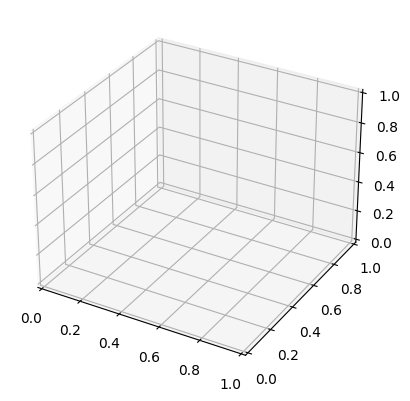

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, Y = np.meshgrid(df['lengthscale'], df['l2regularizer'])
Z = df['rmse_mean']
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()




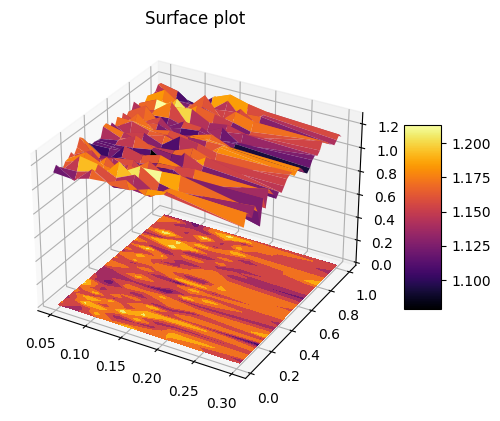

In [77]:
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('Surface plot')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()

In [13]:
def gpr_2d_visual(pred_mean, pred_cov,
                  X_train, y_train, X_test, y_test,
                  title="", save_addr="", fontsize=12):
#     if save_addr:
#         pathlib.Path(save_addr).parent.mkdir(parents=True, exist_ok=True)
#         plt.ioff()

    # prediction surface
    n_reshape = int(np.sqrt(pred_mean.size))
    pred_mean_plot = pred_mean.reshape(n_reshape, n_reshape)
    X_valid = X_test.reshape(n_reshape, n_reshape, 2)
    x_grid, y_grid = X_valid[:, :, 0], X_valid[:, :, 1]

    ax = plt.axes(projection='3d')
    if isinstance(X_train, np.ndarray):
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c="black")
    ax.plot_surface(X=x_grid, Y=y_grid, Z=pred_mean_plot, cmap='inferno')
    ax.set_zlim(np.min(y_test), np.max(y_test))

#     # optionally, compute RMSE
#     if pred_mean.size == y_test.size:
#         rmse = metric_util.rmse(y_test, pred_mean)
#         title = "{}, RMSE={:.4f}".format(title, rmse)

    plt.title(title, fontsize=fontsize)

array([[0.05 , 0.05 , 0.05 , ..., 0.325, 0.325, 0.325],
       [0.05 , 0.05 , 0.05 , ..., 0.325, 0.325, 0.325],
       [0.05 , 0.05 , 0.05 , ..., 0.325, 0.325, 0.325],
       ...,
       [0.05 , 0.05 , 0.05 , ..., 0.325, 0.325, 0.325],
       [0.05 , 0.05 , 0.05 , ..., 0.325, 0.325, 0.325],
       [0.05 , 0.05 , 0.05 , ..., 0.325, 0.325, 0.325]])

In [57]:
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T 